In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [2]:
content= r"E:\New folder (2)\dogs_vs_cats\\"

In [3]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = content+'/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = content+'/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [4]:
# Normalizing
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [50]:
# create CNN model

model = Sequential()

model.add(Conv2D(25,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(50,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(100,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(200,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(75,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(25,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 25)      700       
                                                                 
 batch_normalization_4 (Batc  (None, 254, 254, 25)     100       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 25)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 50)      11300     
                                                                 
 batch_normalization_5 (Batc  (None, 125, 125, 50)     200       
 hNormalization)                                                 
                                                      

In [51]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 89s 140ms/step - loss: 0.7834 - accuracy: 0.5192 - val_loss: 0.6923 - val_accuracy: 0.5022
Epoch 2/10
625/625 [==============================] - 89s 141ms/step - loss: 0.6898 - accuracy: 0.5451 - val_loss: 0.6978 - val_accuracy: 0.5012
Epoch 3/10
625/625 [==============================] - 88s 141ms/step - loss: 0.6473 - accuracy: 0.6089 - val_loss: 0.6669 - val_accuracy: 0.5738
Epoch 4/10
625/625 [==============================] - 90s 144ms/step - loss: 0.5792 - accuracy: 0.6958 - val_loss: 0.5826 - val_accuracy: 0.6524
Epoch 5/10
625/625 [==============================] - 89s 142ms/step - loss: 0.5176 - accuracy: 0.7523 - val_loss: 0.4624 - val_accuracy: 0.7824
Epoch 6/10
625/625 [==============================] - 90s 143ms/step - loss: 0.4524 - accuracy: 0.7961 - val_loss: 0.6442 - val_accuracy: 0.6636
Epoch 7/10
625/625 [==============================] - 91s 145ms/step - loss: 0.3831 - accuracy: 0.8302 - val_loss: 0.4168 - val_ac

In [94]:
train_ds = keras.utils.image_dataset_from_directory(
    directory=content+'/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

class_names = train_ds.class_names

label_0 = class_names[0]
label_1 = class_names[1]

print(f"Label 0: {label_0}")
print(f"Label 1: {label_1}")


Found 20000 files belonging to 2 classes.
Label 0: cats
Label 1: dogs


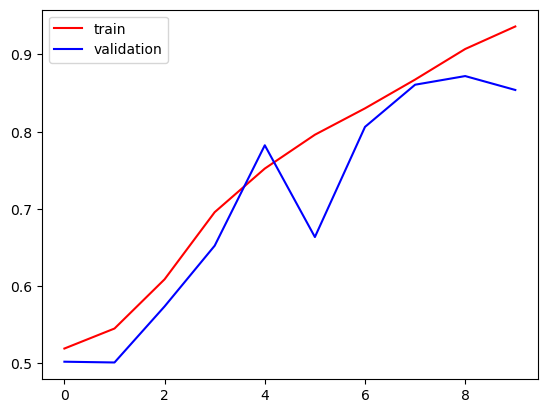

In [96]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [97]:
import cv2

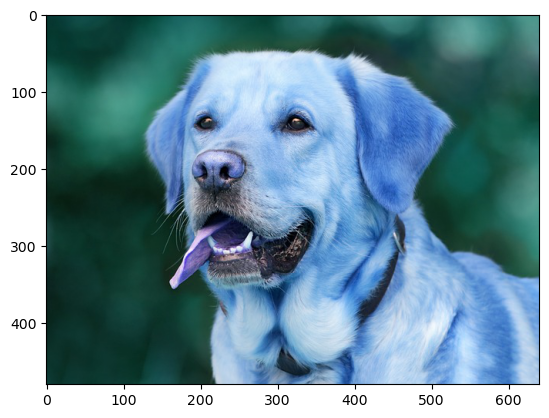

In [98]:
image = cv2.imread(content+ '/dog.jpg')
plt.imshow(image)

In [99]:
image.shape

(480, 640, 3)

In [100]:
test_img = cv2.resize(image,(256,256))

In [101]:
test_input = test_img.reshape((1,256,256,3))

In [102]:
model.predict(test_input)

1/1 [==============================] - 0s 31ms/step


array([[1.]], dtype=float32)

Value 1 is predicted so its a dog

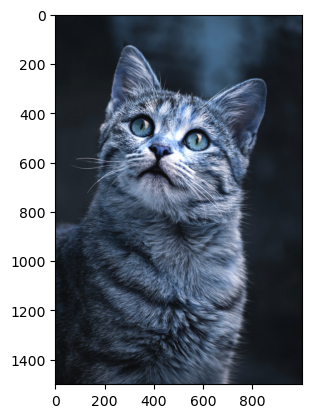

In [103]:
image1=cv2.imread(content+ '/cat.jpg')
plt.imshow(image1)

In [104]:
image1.shape

(1500, 1000, 3)

In [105]:
test_img1 = cv2.resize(image1,(256,256))

In [106]:
test_input1 = test_img1.reshape((1,256,256,3))
model.predict(test_input1)

1/1 [==============================] - 0s 24ms/step


array([[0.]], dtype=float32)

Value 0 is predicted so its a cat